<a href="https://colab.research.google.com/github/jcotass1/2022_ML_EES/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data upload and preprocessing

In [99]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [100]:
import pooch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [107]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

Saving StormEvents_details-ftp_v1.0_d1951_c20210803.csv to StormEvents_details-ftp_v1.0_d1951_c20210803.csv


In [108]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [109]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [110]:
# libraries for the files in google drive
import pandas as pd
from pydrive.auth import GoogleAuth
from google.colab import drive
from google.colab import auth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1lCn6owr8CfJLJzV9YZTlUT4ep7r8Z39g'

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('StormEvents_details-ftp_v1.0_d1951_c20210803.csv')
df  = pd.read_csv("StormEvents_details-ftp_v1.0_d1951_c20210803.csv")
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195109,9,915,195109,9,915,NaN,10047282,MISSISSIPPI,28,...,0,NaN,NaN,33.50,-88.43,NaN,NaN,NaN,NaN,PUB
1,195106,17,2200,195106,17,2200,NaN,10028729,KANSAS,20,...,0,NaN,NaN,39.07,-100.23,NaN,NaN,NaN,NaN,PUB
2,195103,28,510,195103,28,510,NaN,10120421,TEXAS,48,...,0,NaN,NaN,31.37,-95.60,NaN,NaN,NaN,NaN,PUB
3,195105,9,1830,195105,9,1830,NaN,10099717,OKLAHOMA,40,...,0,NaN,NaN,34.45,-98.32,NaN,NaN,NaN,NaN,PUB
4,195107,15,1620,195107,15,1620,NaN,10099742,OKLAHOMA,40,...,0,NaN,NaN,34.80,-94.80,NaN,NaN,NaN,NaN,PUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,195106,27,1930,195106,27,1930,NaN,10009721,ILLINOIS,17,...,0,NaN,NaN,39.95,-89.17,39.95,-88.98,NaN,NaN,PUB
265,195106,27,2045,195106,27,2045,NaN,10009722,ILLINOIS,17,...,0,NaN,NaN,40.27,-89.47,40.27,-89.12,NaN,NaN,PUB
266,195111,13,1315,195111,13,1315,NaN,10009723,ILLINOIS,17,...,0,NaN,NaN,40.20,-89.72,40.60,-88.98,NaN,NaN,PUB
267,195111,13,1450,195111,13,1450,NaN,10009724,ILLINOIS,17,...,0,NaN,NaN,37.90,-89.53,37.97,-89.43,NaN,NaN,PUB


In [119]:
df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,...,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,0.0,2.690000e+02,269.000000,269.0,...,0.0,269.0,0.0,0.0,269.000000,269.000000,89.000000,89.000000,0.0,0.0
mean,195106.167286,16.594796,1619.988848,195106.167286,16.594796,1619.988848,NaN,1.005463e+07,27.851301,1951.0,...,NaN,0.0,NaN,NaN,37.553978,-94.183866,38.814719,-93.892584,NaN,NaN
std,2.286782,8.406828,520.562579,2.286782,8.406828,520.562579,NaN,4.562779e+04,12.843788,0.0,...,NaN,0.0,NaN,NaN,3.824995,8.166019,3.668673,8.449875,NaN,NaN
min,195101.000000,1.000000,10.000000,195101.000000,1.000000,10.000000,NaN,9.979424e+06,1.000000,1951.0,...,NaN,0.0,NaN,NaN,27.100000,-123.230000,30.530000,-122.030000,NaN,NaN
25%,195105.000000,9.000000,1500.000000,195105.000000,9.000000,1500.000000,NaN,1.002868e+07,20.000000,1951.0,...,NaN,0.0,NaN,NaN,35.000000,-99.800000,36.030000,-99.880000,NaN,NaN
50%,195106.000000,18.000000,1730.000000,195106.000000,18.000000,1730.000000,NaN,1.003592e+07,22.000000,1951.0,...,NaN,0.0,NaN,NaN,37.630000,-96.830000,39.330000,-96.320000,NaN,NaN
75%,195107.000000,23.000000,1930.000000,195107.000000,23.000000,1930.000000,NaN,1.009972e+07,40.000000,1951.0,...,NaN,0.0,NaN,NaN,39.780000,-89.250000,41.120000,-89.120000,NaN,NaN
max,195112.000000,31.000000,2359.000000,195112.000000,31.000000,2359.000000,NaN,1.015306e+07,55.000000,1951.0,...,NaN,0.0,NaN,NaN,46.770000,-70.530000,45.220000,-70.970000,NaN,NaN


In [114]:
from sklearn.cluster import KMeans, DBSCAN

In [118]:
import folium

# Create a map centered on the USA
map = folium.Map(location=[39.50, -98.35], zoom_start=4)

# Add a marker for each data point
for lat, lng, label in zip(X['BEGIN_LAT'], X['BEGIN_LON'], kmeans.labels_):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map)

# Display the map
map



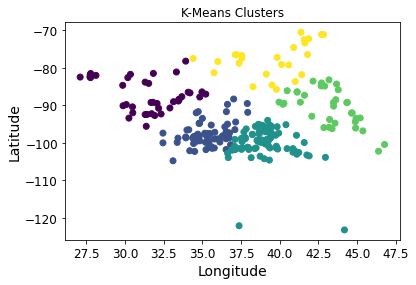

In [120]:
plt.scatter(X['BEGIN_LAT'], X['BEGIN_LON'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clusters')
plt.show()


In [121]:
from sklearn.metrics import silhouette_score

kmeans_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'K-Means score: {kmeans_score:.3f}')


K-Means score: 0.406


In [122]:
dbscan_score = silhouette_score(X_scaled, dbscan.labels_)
print(f'DBSCAN score: {dbscan_score:.3f}')


DBSCAN score: 0.381


The silhouette score ranges from -1 to 1, where a score closer to 1 indicates that the data points in a cluster are more similar to each other and more distinct from the points in other clusters

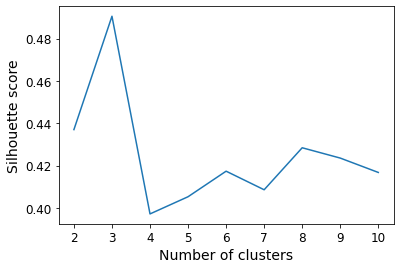

In [123]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an empty list to store silhouette scores
scores = []

# Calculate the silhouette score for a range of values for the number of clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


In [124]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Select the latitude and longitude columns
X = df[['BEGIN_LAT', 'BEGIN_LON']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

# Train a DBSCAN model
dbscan = DBSCAN()
dbscan.fit(X_scaled)

# Evaluate the K-Means model
kmeans_score = silhouette_score(X_scaled, kmeans.labels_)

# Evaluate the DBSCAN model
dbscan_score = silhouette_score(X_scaled, dbscan.labels_)

print(f'K-Means score: {kmeans_score:.3f}')
print(f'DBSCAN score: {dbscan_score:.3f}')


K-Means score: 0.406
DBSCAN score: 0.381


In [139]:
import folium


# Select the latitude and longitude columns
X = df[['BEGIN_LAT', 'BEGIN_LON']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

# Create a map centered on the USA
map = folium.Map(location=[39.50, -98.35], zoom_start=4)

# Define a color palette for the clusters
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Add a marker for each data point
for lat, lng, label in zip(X['BEGIN_LAT'], X['BEGIN_LON'], kmeans.labels_):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color=colors[label],
        fill=True,
        fill_color=colors[label],
        fill_opacity=0.6
    ).add_to(map)

# Display the map
map

